# Subsurface Mapping using Python

In [1]:
# import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
import plotly.graph_objects as go

In [2]:
# read the file
df = pd.read_csv('/work/DIG_2021_0016_Bedrock.csv')
df.head()

,Loc_ID,E_10TM83,N_10TM83,Geol_name,KB_masl28,Gd_el_m28,Gd_el_src,El_masl28,Data_src,MD_m,Publisher
0,100160607211W400,711243.82,6120896.30,Bedrock top,644.8,641.3,Original from well log,495.8,Oil & gas well log,145.5,Alberta Geological Survey
1,100160907713W400,691910.46,6170207.23,Bedrock top,679.8,676.5,Original from well log,442.3,Oil & gas well log,234.2,Alberta Geological Survey
2,GJP_interpretative_points_471,659833.16,6269089.08,Bedrock top,-9999.0,386.1,Environment and Sustainable Development DEM,412.6,Outcrop; interpreted from satellite image...,0.0,Alberta Geological Survey
3,GJP_interpretative_points_473,661498.18,6266773.91,Bedrock top,-9999.0,382.0,Environment and Sustainable Development DEM,387.9,Outcrop; interpreted from satellite image...,0.0,Alberta Geological Survey
4,GJP_interpretative_points_474,660354.47,6266310.47,Bedrock top,-9999.0,445.0,Environment and Sustainable Development DEM,451.7,Outcrop; interpreted from satellite image...,0.0,Alberta Geological Survey


In [3]:
# statistics metrics
df.describe()

,E_10TM83,N_10TM83,KB_masl28,Gd_el_m28,El_masl28,MD_m
count,8847.000000,8.847000e+03,8847.000000,8847.000000,8847.000000,8847.000000
mean,731844.131389,6.194465e+06,-426.378874,604.371030,471.766768,135.884074
std,35318.895856,4.753022e+04,3162.680977,100.342252,64.232289,84.630327
min,630225.620000,6.097703e+06,-9999.000000,239.300000,213.300000,0.000000
25%,709237.710000,6.158495e+06,525.500000,556.000000,431.000000,60.000000
50%,739442.310000,6.182733e+06,618.000000,626.300000,470.200000,144.000000
75%,755300.360000,6.236219e+06,682.000000,679.700000,512.000000,200.000000
max,817662.610000,6.298777e+06,837.000000,843.700000,733.000000,360.000000


In [4]:
# show all columns
df.columns

Index([' Loc_ID ', 'E_10TM83', 'N_10TM83', ' Geol_name ', 'KB_masl28',
       'Gd_el_m28', ' Gd_el_src ', 'El_masl28', ' Data_src ', ' MD_m ',
       ' Publisher '],
      dtype='object')

In [5]:
# review the data of the column ' Loc_ID '
df[' Loc_ID ']

0                    100160607211W400
1                    100160907713W400
2       GJP_interpretative_points_471
3       GJP_interpretative_points_473
4       GJP_interpretative_points_474
                    ...              
8842               250k_contour_49427
8843               250k_contour_58801
8844               250k_contour_58554
8845               250k_contour_40753
8846               250k_contour_49420
Name:  Loc_ID , Length: 8847, dtype: object

In [18]:
# rename columns
df.rename(columns={' Loc_ID ':'Loc_ID','E_10TM83': 'Easting','N_10TM83': 'Northing','El_masl28':'Elevation',' Geol_name ':'Geol_name'  }, inplace=True)
df

,Loc_ID,Easting,Northing,Geol_name,KB_masl28,Gd_el_m28,Gd_el_src,Elevation,Data_src,MD_m,Publisher
0,100160607211W400,711243.82,6120896.30,Bedrock top,644.8,641.3,Original from well log,495.8,Oil & gas well log,145.5,Alberta Geological Survey
1,100160907713W400,691910.46,6170207.23,Bedrock top,679.8,676.5,Original from well log,442.3,Oil & gas well log,234.2,Alberta Geological Survey
2,GJP_interpretative_points_471,659833.16,6269089.08,Bedrock top,-9999.0,386.1,Environment and Sustainable Development DEM,412.6,Outcrop; interpreted from satellite image...,0.0,Alberta Geological Survey
3,GJP_interpretative_points_473,661498.18,6266773.91,Bedrock top,-9999.0,382.0,Environment and Sustainable Development DEM,387.9,Outcrop; interpreted from satellite image...,0.0,Alberta Geological Survey
4,GJP_interpretative_points_474,660354.47,6266310.47,Bedrock top,-9999.0,445.0,Environment and Sustainable Development DEM,451.7,Outcrop; interpreted from satellite image...,0.0,Alberta Geological Survey
...,...,...,...,...,...,...,...,...,...,...,...
8842,250k_contour_49427,717677.79,6127510.25,Bedrock top,-9999.0,653.3,Geological Framework DEM,570.0,Control point (interpreted),83.3,Alberta Geological Survey
8843,250k_contour_58801,784729.65,6250759.81,Bedrock top,-9999.0,457.7,Geological Framework DEM,450.0,Control point (interpreted),7.7,Alberta Geological Survey
8844,250k_contour_58554,795191.40,6242083.93,Bedrock top,-9999.0,488.5,Geological Framework DEM,460.0,Control point (interpreted),28.5,Alberta Geological Survey
8845,250k_contour_40753,675421.90,6205269.88,Bedrock top,-9999.0,590.0,Geological Framework DEM,550.0,Control point (interpreted),40.0,Alberta Geological Survey


In [19]:
# see how many unique elements are in the column: ' Geol_name '
df['Geol_name'].unique()

array([' Bedrock  top ', ' First  White  Specks  Member  top ',
       ' Fish  Scales  Formation  base ', ' Pelican  Formation  top ',
       ' Viking  or  Pelican  Formation  top ',
       ' Joli  Fou  Formation  or  Harmon  Member  top '], dtype=object)

In [29]:
# Create a new dataframe filtered with the value ' Bedrock  top ' from column 'Geol_name' 
bedrock = df.loc[df['Geol_name'] == ' Bedrock  top '][['Easting','Northing','Elevation']]
bedrock

,Easting,Northing,Elevation
0,711243.82,6120896.30,495.8
1,691910.46,6170207.23,442.3
2,659833.16,6269089.08,412.6
3,661498.18,6266773.91,387.9
4,660354.47,6266310.47,451.7
...,...,...,...
8842,717677.79,6127510.25,570.0
8843,784729.65,6250759.81,450.0
8844,795191.40,6242083.93,460.0
8845,675421.90,6205269.88,550.0


In [30]:
# 
numx, numy = (20,20)
xx =np.linspace(-1,1,numx)
yy = np.linspace(-1,1,numy)

In [32]:
xv,yv = np.meshgrid(xx,yy)
xv.shape

(20, 20)

In [33]:
zv = xv ** 2 + yv ** 2

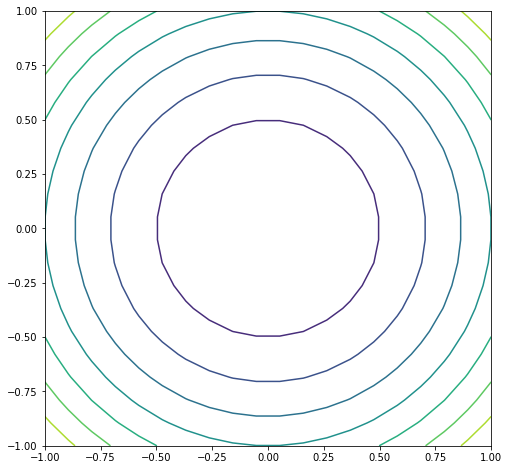

In [34]:
fig1 = plt.figure(figsize=(8,8))
plt.contour(xv,yv,zv)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=22e90012-8c1c-4fa6-bf22-3fab8d76a457' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>